# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
base_seat_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_seat_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,"✅ Trip Verified | BA, after subsequent delays ..."
1,Not Verified | It is embarrassing to have th...
2,✅ Trip Verified | Flight cancelled due to bad ...
3,✅ Trip Verified | British Airways oversold my...
4,✅ Trip Verified | I travelled London to Doha ...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df = pd.read_csv("BA_reviews.csv",encoding="utf-8")

In [ ]:
df.head()

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | BA, after subsequent delays ..."
1,1,Not Verified | It is embarrassing to have th...
2,2,✅ Trip Verified | Flight cancelled due to bad ...
3,3,✅ Trip Verified | British Airways oversold my...
4,4,✅ Trip Verified | I travelled London to Doha ...


In [ ]:
def clean_data(df):
    current_columns = df.columns.tolist()
    new_columns = ['Verification', 'Reviews'] + current_columns[2:]
    df.columns = new_columns

    if df.columns[0] == 'Unnamed: 0':
        df.drop(columns=df.columns[0],inplace=True)
    df.dropna(inplace=True)
    df['Reviews'] = df['Reviews'].apply(lambda x: x.strip()).str.replace('|',' ')
    verified_counts = df['Verification'].value_counts().get('Verified',0)
    non_verified_counts = df['Verification'].value_counts().get('Not Verified',0)
    print("Cleaned Data",df.head())

clean_data(df)

Cleaned Data    Verification                                            Reviews  \
0             0  ✅ Trip Verified   BA, after subsequent delays ...   
1             1  Not Verified     It is embarrassing to have th...   
2             2  ✅ Trip Verified   Flight cancelled due to bad ...   
3             3  ✅ Trip Verified    British Airways oversold my...   
4             4  ✅ Trip Verified    I travelled London to Doha ...   

                                      cleaned_review sentiment  \
0  trip verified ba subsequent delay postponed de...  Negative   
1  verified embarrassing word british attached ai...   Neutral   
2  trip verified flight cancelled due bad weather...  Positive   
3  trip verified british airway oversold lhr lax ...  Negative   
4  trip verified travelled london doha july physi...  Positive   

                                       clean_reviews  \
0  [trip, verified, ba, subsequent, delay, postpo...   
1  [verified, embarrassing, word, british, attach...   
2

In [ ]:
print(df['reviews'])

0      ✅ Trip Verified | BA, after subsequent delays ...
1      Not Verified |   It is embarrassing to have th...
2      ✅ Trip Verified | Flight cancelled due to bad ...
3      ✅ Trip Verified |  British Airways oversold my...
4      ✅ Trip Verified |  I travelled London to Doha ...
                             ...                        
995    ✅ Trip Verified |  Flight was delayed by almos...
996    ✅ Trip Verified | Just checked in for a flight...
997    ✅ Trip Verified |  Gatwick to Madrid. When I a...
998    ✅ Trip Verified |  My boyfriend and I wanted t...
999    ✅ Trip Verified |  I had kept my laptop bag in...
Name: reviews, Length: 1000, dtype: object


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
Reviews = df['reviews'].astype(str).tolist()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_lemmatize_reviews(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

clean_reviews = [clean_lemmatize_reviews(reviews) for reviews in Reviews]
df['clean_reviews'] = clean_reviews
for i, reviews in enumerate(clean_reviews):
    print(f"Cleaned Reviews {i+1}: {reviews}")


Cleaned Reviews 1: ['trip', 'verified', 'ba', 'subsequent', 'delay', 'postponed', 'departure', 'time', 'initial', 'passenger', 'gathering', 'already', 'assigned', 'gate', 'crew', 'ready', 'board', 'aircraft', 'ready', 'outside', 'decided', 'cancel', 'flight', 'reason', 'provided', 'intercom', 'absence', 'pilot', 'passenger', 'told', 'hotel', 'could', 'booked', 'everyone', 'note', 'follow', 'rage', 'mounted', 'amongst', 'u', 'brit', 'done', 'without', 'response', 'others', 'reason', 'insist', 'till', 'crew', 'kept', 'saying', 'rebooking', 'possible', 'apart', 'automated', 'one', 'expected', 'u', 'cross', 'europe', 'get', 'destination', 'hotel', 'booking', 'power', 'either', 'well', 'liar', 'hour', 'pushing', 'raging', 'one', 'person', 'came', 'hotel', 'booking', 'roughly', 'u', 'kept', 'fighting', 'liar', 'also', 'another', 'reason', 'one', 'angel', 'told', 'u', 'way', 'rebooked', 'one', 'took', 'apart', 'suggested', 'way', 'worked', 'meant', 'breaking', 'rule', 'made', 'mess', 'sort', 

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
Cleaned_Reviews = df['clean_reviews'].astype(str).tolist()
def analyze_reviews(text):
    score = analyzer.polarity_scores(text)
    if score['compound']>=0.05:
        return 'Positive'
    elif score['compound']<0:
        return 'Negative'
    else:
        return 'Neutral'

sentiments = [analyze_reviews(reviews) for reviews in Cleaned_Reviews]
counts = pd.Series(sentiments).value_counts()
print(f"Sentiment Counts are {counts}")
df['sentiment'] = sentiments
df.head()


Sentiment Counts are Positive    552
Negative    437
Neutral      11
Name: count, dtype: int64


,Verification,Reviews,cleaned_review,sentiment,clean_reviews,cleaned_reviews
0,0,"✅ Trip Verified BA, after subsequent delays ...",trip verified ba subsequent delay postponed de...,Negative,"[trip, verified, ba, subsequent, delay, postpo...","[trip, verified, ba, subsequent, delay, postpo..."
1,1,Not Verified It is embarrassing to have th...,verified embarrassing word british attached ai...,Neutral,"[verified, embarrassing, word, british, attach...","[verified, embarrassing, word, british, attach..."
2,2,✅ Trip Verified Flight cancelled due to bad ...,trip verified flight cancelled due bad weather...,Positive,"[trip, verified, flight, cancelled, due, bad, ...","[trip, verified, flight, cancelled, due, bad, ..."
3,3,✅ Trip Verified British Airways oversold my...,trip verified british airway oversold lhr lax ...,Negative,"[trip, verified, british, airway, oversold, lh...","[trip, verified, british, airway, oversold, lh..."
4,4,✅ Trip Verified I travelled London to Doha ...,trip verified travelled london doha july physi...,Positive,"[trip, verified, travelled, london, doha, july...","[trip, verified, travelled, london, doha, july..."


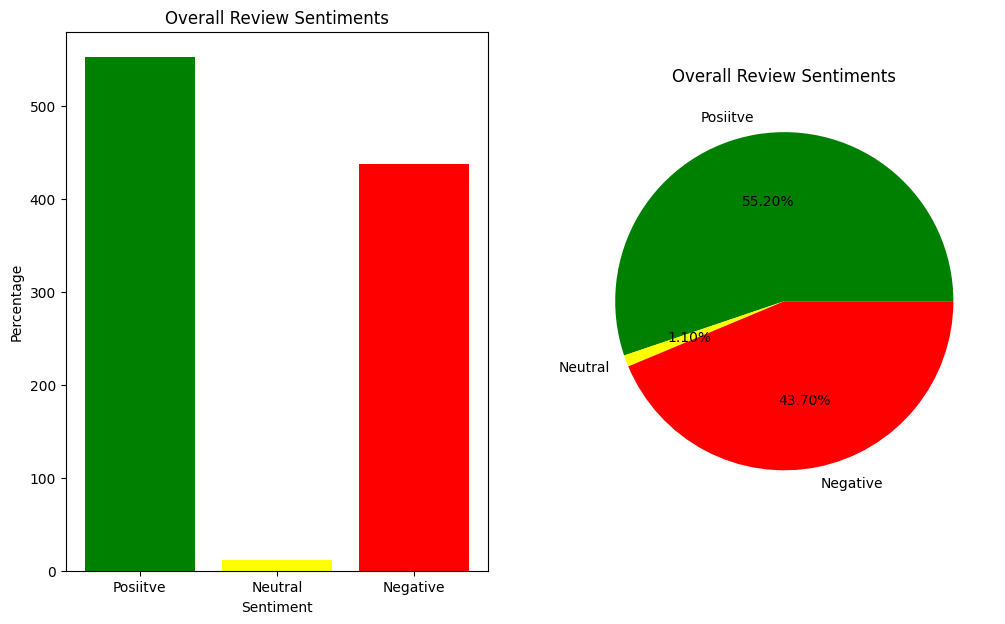

In [ ]:
sentiments = ['Posiitve', 'Neutral', 'Negative']
percentages = [counts['Positive'], counts['Neutral'], counts['Negative']]

fig,ax = plt.subplots(1,2,figsize=(12,7))

ax[0].bar(sentiments, percentages, color=['green','yellow','red'])
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Percentage')
ax[0].set_title('Overall Review Sentiments')

ax[1].pie(percentages, labels=sentiments, colors=['green','yellow','red'], autopct='%0.2f%%')
ax[1].set_title('Overall Review Sentiments')
plt.show()